In [74]:
pip install emoji


In [75]:
!pip install transformers

In [76]:
pip install torch


In [77]:
!pip install transformers

In [78]:
pip install nltk

In [79]:
pip install pydot

In [80]:
pip install graphviz

pip install tensorflow

In [82]:
pip install tensorflow==2.14.0

In [83]:
import numpy as np
import pandas as pd

import re
import emoji
import re

from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth',200)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
# importing nn module
import torch.nn as nn
#library for progress bar
from tqdm import notebook
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler


#library for computing class weights
from sklearn.utils.class_weight import compute_class_weight

from sklearn.metrics import classification_report


import time
import datetime


In [84]:
# Checking if GPU is available.
if torch.cuda.is_available():
  device=torch.device('cuda')

In [85]:
print(device)
torch.cuda.get_device_name(0)
# Current GPU is Tesla T4

cuda


'Tesla T4'

In [86]:
data = pd.read_csv('Tweets.csv')

In [87]:
data.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [88]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13504,569846356409339906,positive,1.0000,NaN,NaN,American,NaN,LisaMitchL,NaN,0,@AmericanAir thank you for doing the best you could to get me rebooked. Agent on phone &amp; addtl resolution on DM was very much appreciated.,NaN,2015-02-23 05:08:53 -0800,Indianapolis,Eastern Time (US & Canada)
13505,569846302663688192,negative,1.0000,Customer Service Issue,0.6834,American,NaN,HaileyUrban,NaN,0,@AmericanAir no email no phone call no nothing. You've screwed with my flight and my family/Friends flights. You Cancelled Flighted reservations for,NaN,2015-02-23 05:08:40 -0800,NaN,Alaska
13506,569846045892608001,negative,1.0000,Customer Service Issue,0.6414,American,NaN,stephenmartino,NaN,0,"@AmericanAir If you care, could you have someone call me to explain what is going on.",NaN,2015-02-23 05:07:39 -0800,"Baltimore, Maryland",Central Time (US & Canada)
13507,569846023553720321,negative,1.0000,Customer Service Issue,0.6681,American,NaN,SFaldon_Sports,NaN,0,Hey @AmericanAir why automated call me and then hang up at 4:45 am!?! And why can't I reschedule Cancelled Flighted flights via web!?! Come on!!!,NaN,2015-02-23 05:07:33 -0800,"Fort Smith, Ark.",Central Time (US & Canada)


In [89]:
#PREPROCESSING

In [90]:
confidence_threshold = 0.6

data = data.drop(data.query("airline_sentiment_confidence < @confidence_threshold").index, axis=0).reset_index(drop=True)

In [91]:
tweets_df = pd.concat([data['text'], data['airline_sentiment']], axis=1)
tweets_df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
2,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
3,@VirginAmerica and it's a really big bad thing about it,negative
4,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,negative
...,...,...
13278,@AmericanAir thank you for doing the best you could to get me rebooked. Agent on phone &amp; addtl resolution on DM was very much appreciated.,positive
13279,@AmericanAir no email no phone call no nothing. You've screwed with my flight and my family/Friends flights. You Cancelled Flighted reservations for,negative
13280,"@AmericanAir If you care, could you have someone call me to explain what is going on.",negative
13281,Hey @AmericanAir why automated call me and then hang up at 4:45 am!?! And why can't I reschedule Cancelled Flighted flights via web!?! Come on!!!,negative


In [92]:
tweets_df.isna().sum().sum()

0

In [93]:
tweets_df['airline_sentiment'].value_counts()

negative    8238
neutral     2851
positive    2194
Name: airline_sentiment, dtype: int64

In [94]:
sentiment_ordering = ['negative', 'neutral', 'positive']

tweets_df['airline_sentiment'] = tweets_df['airline_sentiment'].apply(lambda x: sentiment_ordering.index(x))

In [95]:
tweets_df

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,1
1,@VirginAmerica I didn't today... Must mean I need to take another trip!,1
2,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",0
3,@VirginAmerica and it's a really big bad thing about it,0
4,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,0
...,...,...
13278,@AmericanAir thank you for doing the best you could to get me rebooked. Agent on phone &amp; addtl resolution on DM was very much appreciated.,2
13279,@AmericanAir no email no phone call no nothing. You've screwed with my flight and my family/Friends flights. You Cancelled Flighted reservations for,0
13280,"@AmericanAir If you care, could you have someone call me to explain what is going on.",0
13281,Hey @AmericanAir why automated call me and then hang up at 4:45 am!?! And why can't I reschedule Cancelled Flighted flights via web!?! Come on!!!,0


In [96]:
emoji.demojize('@AmericanAir right on cue with the delays👌')

'@AmericanAir right on cue with the delays:OK_hand:'

In [97]:
ps = PorterStemmer()

def process_tweet(tweet):
    new_tweet = tweet.lower()
    new_tweet = re.sub(r'@\w+', '', new_tweet) # Remove @s
    new_tweet = re.sub(r'#', '', new_tweet) # Remove hashtags
    new_tweet = re.sub(r':', ' ', emoji.demojize(new_tweet)) # Turn emojis into words
    new_tweet = re.sub(r'http\S+', '',new_tweet) # Remove URLs
    new_tweet = re.sub(r'\$\S+', 'dollar', new_tweet) # Change dollar amounts to dollar
    new_tweet = re.sub(r'[^a-z0-9\s]', '', new_tweet) # Remove punctuation
    new_tweet = re.sub(r'[0-9]+', 'number', new_tweet) # Change number values to number
    new_tweet = new_tweet.split(" ")
    new_tweet = list(map(lambda x: ps.stem(x), new_tweet)) # Stemming the words
    new_tweet = list(map(lambda x: x.strip(), new_tweet)) # Stripping whitespace from the words
    if '' in new_tweet:
        new_tweet.remove('')
    return new_tweet

In [98]:
tweets = tweets_df['text'].apply(process_tweet)

labels = np.array(tweets_df['airline_sentiment'])

In [99]:
tweets

0                                                                                                                                            [what, , said]
1                                                                                             [i, didnt, today, must, mean, i, need, to, take, anoth, trip]
2                                               [it, realli, aggress, to, blast, obnoxi, entertain, in, your, guest, face, amp, they, have, littl, recours]
3                                                                                                          [and, it, a, realli, big, bad, thing, about, it]
4                   [serious, would, pay, dollar, a, flight, for, seat, that, didnt, have, thi, playing\nit, realli, the, onli, bad, thing, about, fli, va]
                                                                                ...                                                                        
13278             [thank, you, for, do, the, best, you, could, t

In [100]:
# Get size of vocabulary
vocabulary = set()

for tweet in tweets:
    for word in tweet:
        if word not in vocabulary:
            vocabulary.add(word)

vocab_length = len(vocabulary)

# Get max length of a sequence
max_seq_length = 0

for tweet in tweets:
    if len(tweet) > max_seq_length:
        max_seq_length = len(tweet)

# Print results
print("Vocab length:", vocab_length)
print("Max sequence length:", max_seq_length)

Vocab length: 10759
Max sequence length: 90


In [101]:
tokenizer = Tokenizer(num_words=vocab_length)
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)


word_index = tokenizer.word_index

model_inputs = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

In [102]:
model_inputs


array([[  49,    2,  209, ...,    0,    0,    0],
       [   5,  190,   99, ...,    0,    0,    0],
       [  15,  142, 2740, ...,    0,    0,    0],
       ...,
       [  69,    8,  234, ...,    0,    0,    0],
       [ 490,   70,  851, ...,    0,    0,    0],
       [  30,    7,   40, ...,    0,    0,    0]], dtype=int32)

In [103]:
model_inputs.shape

(13283, 90)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(model_inputs, labels, train_size=0.7, random_state=22)

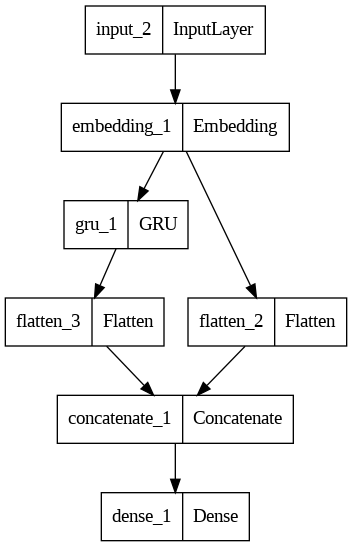

In [105]:
embedding_dim = 32


inputs = tf.keras.Input(shape=(max_seq_length,))

embedding = tf.keras.layers.Embedding(
    input_dim=vocab_length,
    output_dim=embedding_dim,
    input_length=max_seq_length
)(inputs)


# Model A (just a Flatten layer)
flatten = tf.keras.layers.Flatten()(embedding)

# Model B (GRU with a Flatten layer)
gru = tf.keras.layers.GRU(units=embedding_dim)(embedding)
gru_flatten = tf.keras.layers.Flatten()(gru)

# Both A and B are fed into the output
concat = tf.keras.layers.concatenate([flatten, gru_flatten])

outputs = tf.keras.layers.Dense(3, activation='softmax')(concat)


model = tf.keras.Model(inputs, outputs)

tf.keras.utils.plot_model(model)

In [106]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 32
epochs = 100

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True,
            verbose=1
        ),
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
233/233 [==============================] - 26s 96ms/step - loss: 0.8076 - accuracy: 0.6530 - val_loss: 0.7008 - val_accuracy: 0.7054 - lr: 0.0010
Epoch 2/100
233/233 [==============================] - 6s 27ms/step - loss: 0.5502 - accuracy: 0.7829 - val_loss: 0.5706 - val_accuracy: 0.7667 - lr: 0.0010
Epoch 3/100
233/233 [==============================] - 7s 29ms/step - loss: 0.3929 - accuracy: 0.8630 - val_loss: 0.5230 - val_accuracy: 0.7925 - lr: 0.0010
Epoch 4/100
233/233 [==============================] - 4s 18ms/step - loss: 0.2910 - accuracy: 0.9062 - val_loss: 0.5137 - val_accuracy: 0.7957 - lr: 0.0010
Epoch 5/100
233/233 [==============================] - 6s 25ms/step - loss: 0.2163 - accuracy: 0.9360 - val_loss: 0.5246 - val_accuracy: 0.7898 - lr: 0.0010
Epoch 6/100
233/233 [==============================] - 3s 13ms/step - loss: 0.1614 - accuracy: 0.9579 - val_loss: 0.5376 - val_accuracy: 0.7941 - lr: 0.0010
Epoch 7/100
233/233 [==============================] - 2s

In [107]:
model.evaluate(X_test, y_test)

125/125 [==============================] - 1s 5ms/step - loss: 0.4996 - accuracy: 0.8018


[0.49962925910949707, 0.8017565608024597]

In [108]:
# IMPORT BERT AS NLP

In [109]:
from transformers.models.bert.modeling_bert import BertModel
# Import BERT pretrained module
from transformers import BertModel

#Download uncased bert base model
bert=BertModel.from_pretrained('bert-base-uncased')

In [110]:
# Print BERT arcitecture
print(bert)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [111]:
from transformers.models.bert.tokenization_bert_fast import BertTokenizerFast
# importing BERT tokenizer
tokenizer=BertTokenizerFast.from_pretrained('bert-base-uncased',do_lower_case=True)


In [112]:
text='Jim Henson was a puppeteer'
sentence_id=tokenizer.encode(text,
                             # add special character tokens
                             add_special_tokens=True,
                             # Specifying maximum length for any input sequences
                             max_length=10,
                             # if exceeeding 10, then it will be truncated, if <10, then it will be padded.
                             truncation=True,
                             # add pad tokens to the right side of the sequence
                             pad_to_max_length='right'
                             )
print("Integer Sequence:{}".format(sentence_id))

Integer Sequence:[101, 3958, 27227, 2001, 1037, 13997, 11510, 102, 0, 0]


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [113]:
# converting integers back to text
print("Tokenizer Text: ",tokenizer.convert_ids_to_tokens(sentence_id))

Tokenizer Text:  ['[CLS]', 'jim', 'henson', 'was', 'a', 'puppet', '##eer', '[SEP]', '[PAD]', '[PAD]']


In [114]:
decoded=tokenizer.decode(sentence_id)
print('Decoded String:{}'.format(decoded))

Decoded String:[CLS] jim henson was a puppeteer [SEP] [PAD] [PAD]


In [115]:
att_mask=[int(tok>0) for tok in sentence_id]
print(att_mask)

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0]


In [116]:
# convert lists to tensors
# torch.tensor creates a tensor of given data
sent_id=torch.tensor(sentence_id)
attn_mask=torch.tensor(att_mask)
print('Shape of sentence_id before reshaping is: {}'.format(sent_id.shape))
print('Shape of sentence_id before reshaping is: {}'.format(attn_mask.shape))
print('\n')
# reshaping tensor in form of batch,text length
sent_id=sent_id.unsqueeze(0)
attn_mask=attn_mask.unsqueeze(0)
print('Shape of sentence_id after reshaping is: {}'.format(sent_id.shape))
print('Shape of sentence_id after reshaping is: {}'.format(attn_mask.shape))
print('\n')
# reshaped tensor
print(sent_id)


Shape of sentence_id before reshaping is: torch.Size([10])
Shape of sentence_id before reshaping is: torch.Size([10])


Shape of sentence_id after reshaping is: torch.Size([1, 10])
Shape of sentence_id after reshaping is: torch.Size([1, 10])


tensor([[  101,  3958, 27227,  2001,  1037, 13997, 11510,   102,     0,     0]])


In [117]:
# passing integer sequence and attention mask tensor to BERT model
outputs=bert(sent_id,attention_mask=attn_mask)


In [118]:
# Unpacking the output of BERT model

# all_hidden_states is a collection of all the output vectors/ hidden states (of encoder) at each timestamps or position of the BERT model
all_hidden_states=outputs[0]

print(all_hidden_states.shape)
print(all_hidden_states)

torch.Size([1, 10, 768])
tensor([[[-0.2531,  0.2038, -0.3862,  ..., -0.3034,  0.6197,  0.2373],
         [-0.2323, -0.0044, -0.5479,  ...,  0.0765,  0.8122, -0.4710],
         [ 0.2590,  0.7140, -0.5438,  ..., -0.3774,  0.9987,  0.5400],
         ...,
         [ 0.7873,  0.3299, -0.0351,  ...,  0.2932, -0.5141,  0.0308],
         [-0.5547, -0.3669, -0.1106,  ...,  0.2593,  0.5321, -0.3871],
         [-0.5461, -0.2414, -0.2111,  ...,  0.3100,  0.5863, -0.3467]]],
       grad_fn=<NativeLayerNormBackward0>)


In [119]:
# this output contains output vector against the CLS token only (at the first position of BERT model)
# this output vector encodes the entire input sequence

cls_hidden_state=outputs[1]

print(cls_hidden_state.shape)
print(cls_hidden_state)

torch.Size([1, 768])
tensor([[-0.8767, -0.4109, -0.1220,  0.4494,  0.1945, -0.2698,  0.8316,  0.3127,
          0.1178, -1.0000, -0.1561,  0.6677,  0.9891, -0.3451,  0.8812, -0.6753,
         -0.3079, -0.5580,  0.4380, -0.4588,  0.5831,  0.9956,  0.4467,  0.2863,
          0.3924,  0.6864, -0.7513,  0.9043,  0.9436,  0.8207, -0.6493,  0.3524,
         -0.9919, -0.2295, -0.0742, -0.9936,  0.3698, -0.7558,  0.0792, -0.2218,
         -0.8637,  0.4711,  0.9997, -0.4368,  0.0404, -0.3498, -1.0000,  0.2663,
         -0.8711,  0.0508,  0.0505, -0.1634,  0.1716,  0.4363,  0.4330, -0.0333,
         -0.0416,  0.2206, -0.2568, -0.6122, -0.5916,  0.2569, -0.2622, -0.9041,
          0.3221, -0.2394, -0.2634, -0.3454, -0.0723,  0.0081,  0.8297,  0.2279,
          0.1614, -0.6555, -0.2062,  0.3280, -0.4016,  1.0000, -0.0952, -0.9874,
         -0.0400,  0.0717,  0.3675,  0.3373, -0.3710, -1.0000,  0.4479, -0.1722,
         -0.9917,  0.2677,  0.4844, -0.2207, -0.3207,  0.3715, -0.2171, -0.2522,
       

In [120]:
data.shape

(13283, 15)

In [121]:
df=tweets_df

In [122]:
# Sabing value counts to a list
class_counts=df['airline_sentiment'].value_counts().to_list()

In [123]:
#TEXT CLEANING

In [124]:
def preprocess(text):
  # converting text tolower case
  text=text.lower()
  # remove user mentions
  text=re.sub(r'@[A-Za-z0-9]+','',text)
  # remove hashtags if needed keep for now
  #text=re.sub(r'#[A-Za-z0-9]+','',text)

  # remove links
  text=re.sub(r'http\S+','',text)

  # Split tokens so that extra spaces which were added due to above substitution are removed
  tokens=text.split()

  # join tokens by space
  return ' '.join(tokens)

In [125]:
# using apply function to apply this preprocess function on each row of the text column
data['cleaned_text']=data['text'].apply(preprocess)

In [126]:
data.head()[['airline_sentiment','text','cleaned_text']]

,airline_sentiment,text,cleaned_text
0,neutral,@VirginAmerica What @dhepburn said.,what said.
1,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,i didn't today... must mean i need to take another trip!
2,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse","it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
3,negative,@VirginAmerica and it's a really big bad thing about it,and it's a really big bad thing about it
4,negative,@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA,seriously would pay $30 a flight for seats that didn't have this playing. it's really the only bad thing about flying va


In [127]:
# Saving cleaned text and labels to variables
text=data['cleaned_text'].values
labels=data['airline_sentiment'].values

In [128]:
#PREPARING INPUT AND OUTPUT

In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [130]:
# Using label encoder, convert textual labels (positive, negative, neutral) into numners
le=LabelEncoder()

#fit and transform target strings to a number
labels=le.fit_transform(labels)

In [131]:
le.classes_

array(['negative', 'neutral', 'positive'], dtype=object)

In [132]:
labels

array([1, 1, 0, ..., 0, 0, 0])

In [133]:
len(labels)

13283

In [134]:
#VISUALIZATION

Text(0, 0.5, 'Count of sentences')

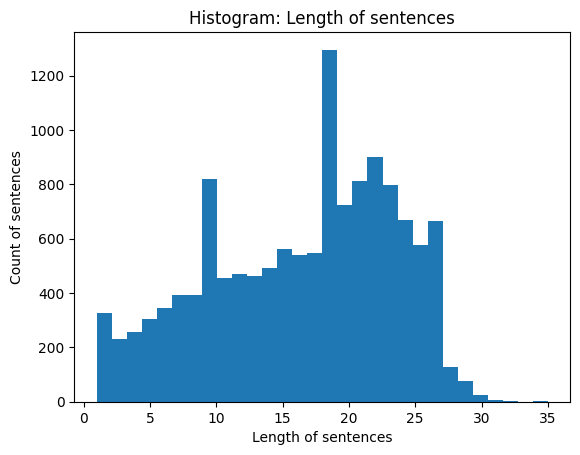

In [135]:
num=[len(i.split()) for i in text]
plt.hist(num,bins=30)
plt.title('Histogram: Length of sentences')
plt.xlabel('Length of sentences')
plt.ylabel('Count of sentences')

In [136]:
max_len=28 # This is a hyper parameter which can be tuned

In [137]:
# Create an empty list to save integer sequence
sent_id=[]

# iterate over each tweet and encode it using bert tokenizer
for i in notebook.tqdm(range(len(text))):
  encoded_sent=tokenizer.encode(text[i],
                                add_special_tokens=True,
                                max_length= max_len,
                                truncation=True,
                                pad_to_max_length='right'
                                )

  # save integer sequence to a list
  sent_id.append(encoded_sent)

  0%|          | 0/13283 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [138]:
print(text[0])

what said.


In [139]:
print(sent_id[0])

[101, 2054, 2056, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [140]:
len(sent_id)

13283

In [141]:
attention_mask=[]

for sent in sent_id:
  attn_mask=[int(token_id>0) for token_id in sent]
  attention_mask.append(attn_mask)

In [142]:
len(attention_mask)

13283

In [143]:
#Training and Validation Data

In [144]:
# Splitting input data
train_inputs,validation_inputs, train_labels,validation_labels=train_test_split(sent_id,labels,random_state=2018, test_size=0.1,stratify=labels)
# Splitting masks
train_mask,validation_mask,_,_= train_test_split(attention_mask,labels,random_state=2018,test_size=0.1,stratify=labels)



In [145]:
# Converting all inputs and labels into torch tensors which is the required datatype for the BERT model

train_inputs=torch.tensor(train_inputs)
train_labels=torch.tensor(train_labels)
train_mask=torch.tensor(train_mask)

validation_inputs=torch.tensor(validation_inputs)
validation_labels=torch.tensor(validation_labels)
validation_mask=torch.tensor(validation_mask)

In [146]:
validation_inputs

tensor([[ 101, 2061, 2008,  ..., 2138, 1997,  102],
        [ 101, 2821, 1012,  ...,    0,    0,    0],
        [ 101, 2339, 2052,  ...,    0,    0,    0],
        ...,
        [ 101, 4283, 2005,  ...,    0,    0,    0],
        [ 101, 7632, 2045,  ..., 1018, 2847,  102],
        [ 101, 2059, 2339,  ..., 2572, 1045,  102]])

In [147]:
# batch size
batch_size=64

# Creating Tensor Dataset for training data
train_data=TensorDataset(train_inputs,train_mask,train_labels)

# Defining a random sampler during training
train_sampler=RandomSampler(train_data)

# Creating iterator using DataLoader. This iterator supports batching, customized data loading order
train_dataloader=DataLoader(train_data,sampler=train_sampler,batch_size=batch_size )

# Creating tensor dataset for validation data
validation_data=TensorDataset(validation_inputs,validation_mask,validation_labels)

# Defining a sequential sampler during validation, bcz there is no need to shuffle the data. We just need to validate
validation_sampler=SequentialSampler(validation_data)

# Create an iterator over validation dataset
validation_dataloader=DataLoader(validation_data,sampler=validation_sampler,batch_size=batch_size)



In [148]:
# Create an iterator object
iterator=iter(train_dataloader)

# loads batch data
sent_id,mask,target=iterator.__next__()

In [149]:
sent_id.shape

torch.Size([64, 28])

In [150]:
outputs=bert(sent_id,attention_mask=mask)

In [151]:
hidden_states=outputs[0]
CLS_hidden_state=outputs[1]

print("Shape of Hidden States:",hidden_states.shape)
print("Shape of CLS Hidden State:",CLS_hidden_state.shape)

Shape of Hidden States: torch.Size([64, 28, 768])
Shape of CLS Hidden State: torch.Size([64, 768])


In [152]:
type(hidden_states)

torch.Tensor

In [153]:
#Fine-Tuning BERT

In [154]:
# turn off the gradient of all parameters

for param in bert.parameters():
  param.requires_grad=False

In [155]:
class classifier(nn.Module):

    #define the layers and wrappers used by model
    def __init__(self, bert):

      #constructor
      super(classifier, self).__init__()

      #bert model
      self.bert = bert

      # dense layer 1
      self.fc1 = nn.Linear(768,512)

      #dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,3)

      #dropout layer
      self.dropout = nn.Dropout(0.1)

      #relu activation function
      self.relu =  nn.ReLU()

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model
      all_hidden_states, cls_hidden_state = self.bert(sent_id, attention_mask=mask, return_dict=False)

      #pass CLS hidden state to dense layer
      x = self.fc1(cls_hidden_state)

      #Apply ReLU activation function
      x = self.relu(x)

      #Apply Dropout
      x = self.dropout(x)

      #pass input to the output layer
      x = self.fc2(x)

      #apply softmax activation
      x = self.softmax(x)

      return x

In [156]:
# create the model
model=classifier(bert)

# push the model to GPU, if available
model=model.to(device)

In [157]:
# model arcitecture
model

classifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine

In [158]:
type(sent_id)

torch.Tensor

In [159]:
# push the tensors to GPU
sent_id=sent_id.to(device)
mask=mask.to(device)
target=target.to(device)


In [160]:
# pass inputs to the model
outputs=model(sent_id,mask)

In [161]:
outputs=outputs.to(device)

In [162]:
print(outputs)

tensor([[-1.2232, -1.0100, -1.0744],
        [-1.1630, -1.1001, -1.0368],
        [-1.2991, -0.9757, -1.0490],
        [-1.1139, -1.0148, -1.1737],
        [-1.2009, -1.0234, -1.0797],
        [-1.1697, -1.0318, -1.0991],
        [-1.0872, -1.0524, -1.1592],
        [-1.2265, -0.9934, -1.0895],
        [-1.1732, -1.0778, -1.0490],
        [-1.1801, -1.0813, -1.0397],
        [-1.1764, -1.0488, -1.0752],
        [-1.1602, -1.0256, -1.1148],
        [-1.2054, -1.0620, -1.0366],
        [-1.1465, -1.0620, -1.0892],
        [-1.2220, -1.0083, -1.0773],
        [-1.2599, -0.9961, -1.0584],
        [-1.2138, -1.0896, -1.0035],
        [-1.1712, -1.1177, -1.0134],
        [-1.2372, -1.0056, -1.0672],
        [-1.1331, -1.1503, -1.0178],
        [-1.2231, -1.0425, -1.0409],
        [-1.1484, -1.1201, -1.0311],
        [-1.2305, -0.9841, -1.0963],
        [-1.2644, -0.9668, -1.0868],
        [-1.1275, -1.0897, -1.0793],
        [-1.1852, -1.0842, -1.0324],
        [-1.1931, -1.0517, -1.0574],
 

In [163]:
# no. of trainable parameters
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')


The model has 395,267 trainable parameters


In [164]:
# Adam optmizer
optimizer=torch.optim.Adam(model.parameters(),lr=0.0005)

Text(0.5, 1.0, 'Class Distribution')

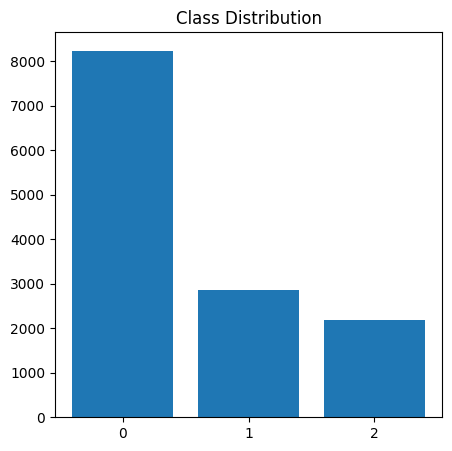

In [165]:
# Understnding class distribution

keys=['0','1','2']

# set figure size
plt.figure(figsize=(5,5))

# plot bar chart
plt.bar(keys,class_counts)

# set title
plt.title('Class Distribution')

In [166]:
# library for array processing
import numpy as np

# computing the class weights
class_weights=compute_class_weight(class_weight='balanced',classes=np.unique(labels),y=labels)
print("Class Weights:",class_weights)

Class Weights: [0.53746864 1.55302233 2.01807961]


In [167]:
# Converting a list of class weights into a tensor
weights=torch.tensor(class_weights, dtype=torch.float)

# transferring weights to GPU
weights=weights.to(device)

# define the loss function
cross_entropy=nn.NLLLoss(weight=weights)

In [168]:
# Computing the loss
print(target)
#print(outputs)
loss=cross_entropy(outputs,target)
print('Loss: ',loss)

tensor([0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 2, 0, 0,
        0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 1, 0, 1,
        0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 2], device='cuda:0')
Loss:  tensor(1.1130, device='cuda:0', grad_fn=<NllLossBackward0>)


In [169]:
# Function for computing time in hh:mm:ss

def format_time(elapsed):

  elapsed_rounded=int(round(elapsed))

  # format intp hh:mm:ss
  return str(datetime.timedelta(seconds=elapsed_rounded))

In [170]:
# Defining a training function for the model:

def train():
  print('\n Training')

  # set the model on training phase- Dropout layers are activated
  model.train()
  # recording current time
  t0=time.time()
  # initialize the loss and accuracy to 0
  total_loss,total_accuracy=0,0

  # Create an empty list to save the model prediction
  total_preds=[]

  # for every batch
  for step, batch in enumerate(train_dataloader):
    #Progress update after every 40 batches
    if step % 40==0 and not step==0:
      elapsed=format_time(time.time()-t0)         # Calculate elapsed time in minutes
      print(' Batch{:>5,} of {:>5,}. Elapsed: {:}.'.format(step,len(train_dataloader),elapsed)) # Print progress
    batch=tuple(t.to(device) for t in batch)      # push the batch to GPU

    # batch is a part of all the records in train_dataloader. It contains 3 pytorch tensors:
    # [0]: input ids
    # [1]: attention masks
    # [2]: labels

    sent_id,mask,labels=batch

    #Pytorch doesn't automatically clear previously calculated gradients, hence before performing a backward pass, clear previous gradients
    model.zero_grad()

    # Perform a forward pass. This returns the model predictions
    preds=model(sent_id,mask)

    # Compute the loss between actual and predicted values
    loss=cross_entropy(preds,labels)

    #Accumulate training loss over all the batches, so that we can calculate the average loss at the end
    # loss is a tensor containing a single value.
    # .itme() method just returns the Python value from the tensor

    total_loss=total_loss+loss.item()

    # Perform backward pass to calculate the gradients
    loss.backward()
    # During backward pass, information about parameter changes flows backwards, from the output to the hidden layers to the input

    optimizer.step()
    # Update parameters and take a step using the computed gradient.
    # Here, the optimizer dictates the update rule = how the parameters are modified based on their gradients, learning rate and so on.

    # The model predictions are stored on GPU, so push it to CPU
    preds=preds.detach().cpu().numpy()

    # Accumulate model predicitons of each batch
    total_preds.append(preds)



    # Compute the training loss of an epoch
  avg_loss=total_loss/len(train_dataloader)

  # The prediction are in the form of (no. of batches, size of batch, no. of classes)
  # So we need to resahpe the predictions in the form of number of samples x number of classes

  total_preds=np.concatenate(total_preds, axis=0)

  return avg_loss,total_preds

In [171]:
#EVALUATION

In [172]:
# define a function for evaluating the model

def evaluate():
  print("'n Evaluating....")

  # set the model on validation phase. Here dropout layers are deactivated
  model.eval()

  # record the current time
  t0=time.time()

  # initialize loss and accuracy to 0
  total_loss, total_accuracy=0,0

  # Create an empty list to save model predicitons
  total_preds=[]

  # for each batch

  for step, batch in enumerate(validation_dataloader):
    if step%40==0 and not step ==0:
      elapsed=format_time(time.time()-t0)
      print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(validation_dataloader), elapsed))

    batch=tuple(t.to(device) for t in batch)
    sent_id,mask,labels=batch

    #deactivate autograd
    with torch.no_grad():

      preds=model(sent_id,mask)
      loss=cross_entropy(preds,labels)
      total_loss=total_loss+loss.item()
      preds=preds.detach().cpu().numpy()
      total_preds.append(preds)

    avg_loss=total_loss/len(validation_dataloader)

    total_preds=np.concatenate(total_preds,axis=0)

    return avg_loss,total_preds


In [173]:
#define a function for evaluating the model
def evaluate():

  print("\nEvaluating.....")

  #set the model on training phase - Dropout layers are deactivated
  model.eval()

  #record the current time
  t0 = time.time()

  #initialize the loss and accuracy to 0
  total_loss, total_accuracy = 0, 0

  #Create a empty list to save the model predictions
  total_preds = []

  #for each batch
  for step,batch in enumerate(validation_dataloader):

    # Progress update every 40 batches.
    if step % 40 == 0 and not step == 0:

      # Calculate elapsed time in minutes.
      elapsed = format_time(time.time() - t0)

      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(validation_dataloader), elapsed))

    #push the batch to gpu
    batch = tuple(t.to(device) for t in batch)

    #unpack the batch into separate variables
    # `batch` contains three pytorch tensors:
    #   [0]: input ids
    #   [1]: attention masks
    #   [2]: labels
    sent_id, mask, labels = batch

    #deactivates autograd
    with torch.no_grad():

      # Perform a forward pass. This returns the model predictions
      preds = model(sent_id, mask)

      #compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      # Accumulate the validation loss over all of the batches so that we can
      # calculate the average loss at the end. `loss` is a Tensor containing a
      # single value; the `.item()` function just returns the Python value
      # from the tensor.
      total_loss = total_loss + loss.item()

      #The model predictions are stored on GPU. So, push it to CPU
      preds=preds.detach().cpu().numpy()

      #Accumulate the model predictions of each batch
      total_preds.append(preds)

  #compute the validation loss of a epoch
  avg_loss = total_loss / len(validation_dataloader)

  #The predictions are in the form of (no. of batches, size of batch, no. of classes).
  #So, reshaping the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

In [174]:
#TRAIN MODEL

In [175]:
# Assign the initial loss to infinite
best_valid_loss=float('inf')

# Create an empty list to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

epochs=5

#for each epoch repeat call the train() method
for epoch in range(epochs):
  print('\n ............epoch {:} / {:} .......'.format(epoch + 1, epochs))

  #train model
  train_loss,_ =train()

  #evaluate model
  valid_loss,_=evaluate()

  # save the best model
  if valid_loss<best_valid_loss:
    best_valid_loss=valid_loss
    torch.save(model.state_dict(),'Saved_weights.pt')

  # Accumulate training and validaion loss
  train_losses.append(train_loss)
  valid_losses.append(valid_loss)

  print(f'\nTraining Loss: {train_loss:.3f}')
  print(f'Validation Loss: {valid_loss:.3f}')

print("")
print("Training complete!")


 ............epoch 1 / 5 .......

 Training
 Batch   40 of   187. Elapsed: 0:00:04.
 Batch   80 of   187. Elapsed: 0:00:08.
 Batch  120 of   187. Elapsed: 0:00:12.
 Batch  160 of   187. Elapsed: 0:00:16.

Evaluating.....

Training Loss: 0.990
Validation Loss: 0.910

 ............epoch 2 / 5 .......

 Training
 Batch   40 of   187. Elapsed: 0:00:04.
 Batch   80 of   187. Elapsed: 0:00:09.
 Batch  120 of   187. Elapsed: 0:00:13.
 Batch  160 of   187. Elapsed: 0:00:17.

Evaluating.....

Training Loss: 0.824
Validation Loss: 0.775

 ............epoch 3 / 5 .......

 Training
 Batch   40 of   187. Elapsed: 0:00:04.
 Batch   80 of   187. Elapsed: 0:00:09.
 Batch  120 of   187. Elapsed: 0:00:14.
 Batch  160 of   187. Elapsed: 0:00:18.

Evaluating.....

Training Loss: 0.774
Validation Loss: 0.722

 ............epoch 4 / 5 .......

 Training
 Batch   40 of   187. Elapsed: 0:00:04.
 Batch   80 of   187. Elapsed: 0:00:09.
 Batch  120 of   187. Elapsed: 0:00:14.
 Batch  160 of   187. Elapsed: 0:0

In [176]:
#EVALUATE MODEL

In [177]:
  # load weights of best model
path='Saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [178]:
# get the model prediction on the validation data
valid_loss, preds=evaluate()
# this returns 2 elements- Validation loss and prediction
print(valid_loss)


Evaluating.....
0.698055747009459


In [179]:
# Converting the log(probabilities) into class & then choosing index of maximum value as class
y_pred=np.argmax(preds,axis=1)

# actual labels
y_true=validation_labels

In [180]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       824
           1       0.51      0.55      0.53       285
           2       0.57      0.80      0.66       220

    accuracy                           0.72      1329
   macro avg       0.65      0.70      0.67      1329
weighted avg       0.75      0.72      0.73      1329

